In [48]:
# Import plotting modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Set default Seaborn style
sns.set()

df=pd.read_csv('customers.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

In [3]:
# Number of rows
print(df.shape[0])

440


In [4]:
# Column names
print(df.columns.tolist())

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']


In [5]:
# Data types
print(df.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object


In [12]:
df['Channel'] = df['Channel'].astype(np.float)
df['Region'] = df['Region'].astype(np.float)
print(df.dtypes)

Channel             float64
Region              float64
Fresh                 int64
Milk                  int64
Grocery               int64
Frozen                int64
Detergents_Paper      int64
Delicatessen          int64
dtype: object


In [38]:
from scipy.stats import kurtosis, skew
#df['Channel'].quantile([0,0.25,0.5,0.75,1])
print(df['Grocery'].describe())
# Compute the mean: mean_length_vers
mean_grocery = np.mean(df['Grocery'])
median_grocery = np.median(df['Grocery'])
std_grocery = np.std(df['Grocery'])
print("mean  :",mean_grocery)
print("median:",median_grocery)
print("std   : ",std_grocery)
print("skew  : ",skew(df['Grocery']))
print("kurt  : ",kurtosis(df['Grocery']))

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64
mean  : 7951.277272727273
median: 4755.5
std   :  9492.35763751948
skew  :  3.5751872200807875
kurt  :  20.664153228293365


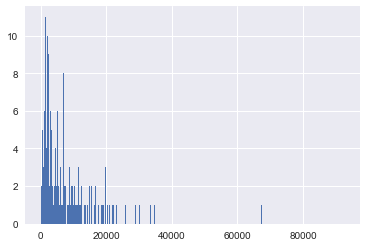

In [45]:
# Create box plot with Seaborn's default settings
#_ = sns.boxplot(x='Grocery', data=df)

# Label the axes
#plt.xlabel('Grocery')

# Show the plot
plt.hist(df.Grocery,bins=1000)
plt.show()


In [46]:
#Question 3: Correction
print(df['Grocery'].corr(df['Milk']))

0.7283351181536448


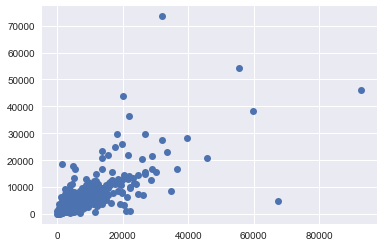

In [52]:
plt.plot(df['Grocery'],df['Milk'],ls='',marker='o')
plt.show()

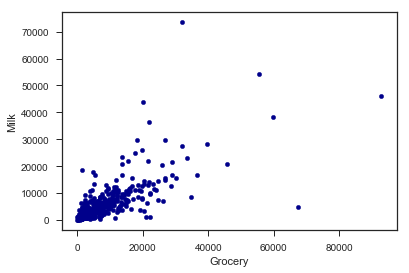

In [96]:
d = pd.DataFrame({"Grocery" : (df['Grocery']), "Milk" : (df['Milk'])})
df1 = pd.DataFrame(d)
ax1 = df1.plot.scatter(x='Grocery',y='Milk',c='DarkBlue')

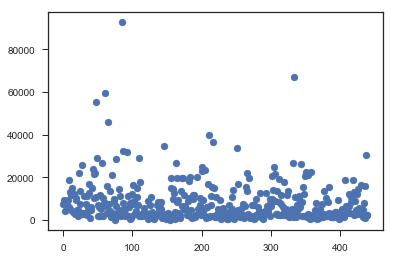

In [99]:
#Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
ser = pd.Series(df['Grocery'])
plt.scatter(ser.index, ser)
plt.show()

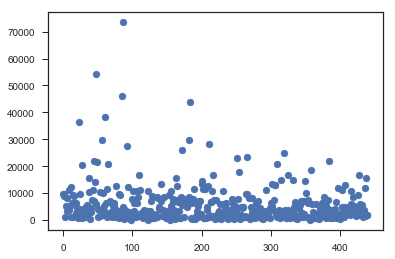

In [100]:
# Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
ser = pd.Series(df['Milk'])
plt.scatter(ser.index, ser)
plt.show()

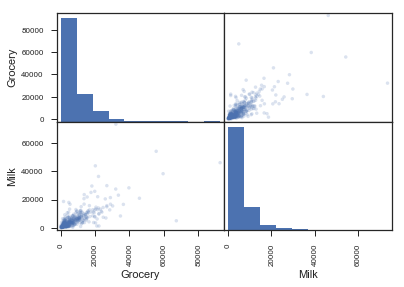

In [106]:
#Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
df2 = pd.DataFrame({"Grocery" : (df['Grocery']), "Milk" : (df['Milk'])})
pd.plotting.scatter_matrix(df2, alpha=0.2)
plt.show()

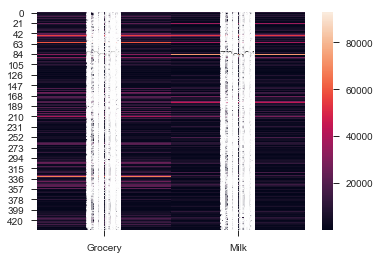

In [109]:
#Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )
sns.heatmap(df2, annot=True)
plt.show()

In [114]:
#Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
import scipy.stats as ss
p=0.1
#('Grocery', 'Milk')
c, pval_1 = ss.pearsonr(df['Grocery'],df['Milk'])
print("Grocery - Milk")
print("Correlation:", c)
print("p-value for non-correlation:", pval)
if p<pval_1:
    print("Accept H")
else:
    print("Reject H")
#'Grocery', 'Fresh')
print("Grocery - Fresh")
c, pval_2 = ss.pearsonr(df['Grocery'],df['Fresh'])
print("Correlation:", c)
print("p-value for non-correlation:", pval)
if p<pval_2:
    print("Accept H")
else:
    print("Reject H")
#'Fresh', 'Milk')
print("Fresh - Milk")
c, pval_3 = ss.pearsonr(df['Fresh'],df['Milk'])
print("Correlation:", c)
print("p-value for non-correlation:", pval)
if p<pval_3:
    print("Accept H")
else:
    print("Reject H")

#With the significance level 0.1 (p-given or α =0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."

Grocery - Milk
Correlation: 0.7283351181536448
p-value for non-correlation: 0.03506100703784227
Reject H
Grocery - Fresh
Correlation: -0.011853874984010514
p-value for non-correlation: 0.03506100703784227
Accept H
Fresh - Milk
Correlation: 0.1005097682998585
p-value for non-correlation: 0.03506100703784227
Reject H


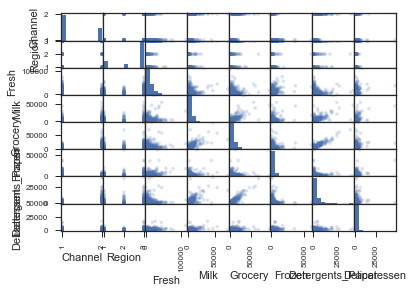

In [116]:
#Transform the data by using np.log and set the new data as the name 'log_data', then visualize this data by using pd.scatter_matrix.
from numpy import log
log_data = np.log(df)
pd.plotting.scatter_matrix(df, alpha=0.2)
plt.show()

In [123]:
# Remove outliers of each features of 'log_data' whose are out of the fencies
# Q1−IQR∗1.5 = Q1-(Q3-Q1)*1.5=2.5Q1 - 1.5Q3
#  and Q3+IQR∗1.5=Q3+(Q3-Q1)*1.5=2.5Q3 - 1.5Q1
# set the new data by the name 'good_log_data' then visualize this data. 
#['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
outliers=[]
for feature in 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist()


Outlier step: 1.5
Data points considered outliers for the feature 'Channel':


Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []

Outlier step: 1.5
Data points considered outliers for the feature 'Region':


Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicatessen]
Index: []

Outlier step: 20709.0
Data points considered outliers for the feature 'Fresh':


Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29         1       3   43088   2100     2609    1200              1107   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
52         2       3   40721   3916     5876     532              2587   
87         1       3   43265   5025     8117    6312              1579   
103        1       3   56082   3504     8906   18028              1480   
125        1       3   76237   3473     7102   16538               778   
129        1       3   42312    926     1510    1718               410   
176        1       3   45640   6958     6536    7368              1532   
181        1       3  112151  29627    18148   16745              4948   
239        1       1   47493   2567     3779    5243               828   
258        1       1   56083   4563     2124    6422               730   
259        1       1   53205   4959     7336    3012               967   
282        1       3   49063   3965     4252    5970              1041   
284        1       3   68951   4411    12609    8692               751   
285        1       3   40254    640     3600    1042               436   
289        1       3   42786    286      471    1388                32   
370        2       3   39679   3944     4955    1364               523   
377        1       3   38793   3154     2648    1034                96   
436        1       3   39228   1431      764    4510                93   

     Delicatessen  
29            823  
39           2916  
47           6465  
52           1278  
87          14351  
103          2498  
125           918  
129          1819  
176           230  
181          8550  
239          2253  
258          3321  
259           818  
282          1404  
284          2406  
285            18  
289            22  
370          2235  
377          1242  
436          2346

Outlier step: 8485.875
Data points considered outliers for the feature 'Milk':


Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23         2       3   26373  36423    22019    5154              4337   
28         2       3    4113  20484    25957    1158              8604   
38         2       3    4591  15729    16709      33              6956   
45         2       3    5181  22044    21531    1740              7353   
47         2       3   44466  54259    55571    7782             24171   
49         2       3    4967  21412    28921    1798             13583   
56         2       3    4098  29892    26866    2616             17740   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
92         2       3    9198  27472    32034    3232             18906   
109        2       3    1406  16729    28986     673               836   
163        2       3    5531  15726    26870    2367             13726   
171        2       3     200  25862    19816     651              8773   
181        1       3  112151  29627    18148   16745              4948   
183        1       3   36847  43950    20170   36534               239   
211        2       1   12119  28326    39694    4736             19410   
216        2       1    2532  16599    36486     179             13308   
251        2       1    6134  23133    33586    6746             18594   
254        1       1   10379  17972     4748    4686              1547   
265        1       1    5909  23527    13699   10155               830   
309        2       2     918  20655    13567    1465              6846   
319        2       2    9759  25071    17645    1128             12408   
325        1       2   32717  16784    13626   60869              1272   
358        1       3     759  18664     1660    6114               536   
384        1       3   10683  21858    15400    3635               282   
427        1       3   31012  16687     5429   15082               439   

     Delicatessen  
23          16523  
28           5206  
38            433  
45           4985  
47           6465  
49           1163  
56           1340  
61           2017  
65           1423  
85           2944  
86            903  
92           5130  
109             3  
163           446  
171          6250  
181          8550  
183         47943  
211          2870  
216           674  
251          5121  
254          3265  
265          3636  
309           806  
319          1625  
325          5609  
358          4100  
384          5120  
427          1163

Outlier step: 12754.125
Data points considered outliers for the feature 'Grocery':


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
28         2       3   4113  20484    25957    1158              8604   
43         2       3    630  11095    23998     787              9529   
47         2       3  44466  54259    55571    7782             24171   
49         2       3   4967  21412    28921    1798             13583   
56         2       3   4098  29892    26866    2616             17740   
61         2       3  35942  38369    59598    3254             26701   
65         2       3     85  20959    45828      36             24231   
77         2       3  12205  12697    28540     869             12034   
85         2       3  16117  46197    92780    1026             40827   
86         2       3  22925  73498    32114     987             20070   
92         2       3   9198  27472    32034    3232             18906   
109        2       3   1406  16729    28986     673               836   
145        2       3  22039   8384    34792      42             12591   
163        2       3   5531  15726    26870    2367             13726   
201        2       1   4484  14399    24708    3549             14235   
205        2       1   1107  11711    23596     955              9265   
211        2       1  12119  28326    39694    4736             19410   
216        2       1   2532  16599    36486     179             13308   
251        2       1   6134  23133    33586    6746             18594   
304        2       2    161   7460    24773     617             11783   
331        2       2  11223  14881    26839    1234              9606   
333        2       2   8565   4980    67298     131             38102   
343        2       3   1689   6964    26316    1456             15469   
437        2       3  14531  15488    30243     437             14841   

     Delicatessen  
28           5206  
43             72  
47           6465  
49           1163  
56           1340  
61           2017  
65           1423  
77           1009  
85           2944  
86            903  
92           5130  
109             3  
145          4430  
163           446  
201          1681  
205           710  
211          2870  
216           674  
251          5121  
304          2410  
331          1102  
333          1215  
343            37  
437          1867

Outlier step: 4218.0
Data points considered outliers for the feature 'Frozen':


Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
22         1       3   31276   1917     4469    9408              2381   
39         1       3   56159    555      902   10002               212   
40         1       3   24025   4332     4757    9510              1145   
47         2       3   44466  54259    55571    7782             24171   
70         1       3   16705   2037     3202   10643               116   
72         1       3    4420   5139     2661    8872              1321   
73         2       3   19899   5332     8713    8132               764   
88         1       3    7864    542     4042    9735               165   
91         1       3   12754   2762     2530    8693               627   
93         1       3   11314   3090     2062   35009                71   
103        1       3   56082   3504     8906   18028              1480   
112        1       3   19046   2770     2469    8853               483   
125        1       3   76237   3473     7102   16538               778   
126        1       3   19219   1840     1658    8195               349   
143        1       3   10405   1596     1096    8425               399   
181        1       3  112151  29627    18148   16745              4948   
183        1       3   36847  43950    20170   36534               239   
195        1       3   17023   5139     5230    7888               330   
196        1       1   30624   7209     4897   18711               763   
230        2       1   11072   5989     5615    8321               955   
240        1       1   22096   3575     7041   11422               343   
265        1       1    5909  23527    13699   10155               830   
277        1       3    9061    829      683   16919               621   
283        1       3   25767   3613     2013   10303               314   
284        1       3   68951   4411    12609    8692               751   
287        1       3   15354   2102     2828    8366               386   
310        1       2    7034   1492     2405   12569               299   
325        1       2   32717  16784    13626   60869              1272   
328        1       2   16933   2209     3389    7849               210   
334        2       2   16823    928     2743   11559               332   
337        1       2    9351   1347     2611    8170               442   
338        1       2       3    333     7021   15601                15   
339        1       2    2617   1188     5332    9584               573   
371        1       3   20105   1887     1939    8164               716   
381        1       3   17770   4591     1617    9927               246   
393        1       3   23632   6730     3842    8620               385   
401        1       3   27167   2801     2128   13223                92   
406        1       3   25066   5010     5026    9806              1092   
413        1       3    4983   4859     6633   17866               912   
425        1       3   11243   2408     2593   15348               108   
427        1       3   31012  16687     5429   15082               439   
431        1       3    8533   5506     5160   13486              1377   
435        1       3   29703  12051    16027   13135               182   

     Delicatessen  
22           4334  
39           2916  
40           5864  
47           6465  
70           1365  
72            181  
73            648  
88             46  
91           1117  
93           2698  
103          2498  
112          2708  
125           918  
126           483  
143           318  
181          8550  
183         47943  
195          1755  
196          2876  
230          2137  
240          2564  
265          3636  
277           139  
283          1384  
284          2406  
287          1027  
310          1117  
325          5609  
328          1534  
334          3486  
337           868  
338           550  
339          1942  
371           790  
381           532  
393           819  
401     

Outlier step: 5497.875
Data points considered outliers for the feature 'Detergents_Paper':


Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
43         2       3    630  11095    23998     787              9529   
47         2       3  44466  54259    55571    7782             24171   
49         2       3   4967  21412    28921    1798             13583   
56         2       3   4098  29892    26866    2616             17740   
61         2       3  35942  38369    59598    3254             26701   
65         2       3     85  20959    45828      36             24231   
77         2       3  12205  12697    28540     869             12034   
85         2       3  16117  46197    92780    1026             40827   
86         2       3  22925  73498    32114     987             20070   
92         2       3   9198  27472    32034    3232             18906   
145        2       3  22039   8384    34792      42             12591   
155        2       3   1989  10690    19460     233             11577   
163        2       3   5531  15726    26870    2367             13726   
173        2       3    514   7677    19805     937              9836   
200        2       1   3067  13240    23127    3941              9959   
201        2       1   4484  14399    24708    3549             14235   
209        2       1   5550  12729    16767     864             12420   
211        2       1  12119  28326    39694    4736             19410   
216        2       1   2532  16599    36486     179             13308   
251        2       1   6134  23133    33586    6746             18594   
303        2       2   2599   3688    13829     492             10069   
304        2       2    161   7460    24773     617             11783   
312        2       2   2137   3737    19172    1274             17120   
319        2       2   9759  25071    17645    1128             12408   
331        2       2  11223  14881    26839    1234              9606   
333        2       2   8565   4980    67298     131             38102   
343        2       3   1689   6964    26316    1456             15469   
349        2       3   5981  14641    20521    2005             12218   
351        2       3   1210  10044    22294    1741             12638   
437        2       3  14531  15488    30243     437             14841   

     Delicatessen  
43             72  
47           6465  
49           1163  
56           1340  
61           2017  
65           1423  
77           1009  
85           2944  
86            903  
92           5130  
145          4430  
155          2153  
163           446  
173           716  
200           731  
201          1681  
209           797  
211          2870  
216           674  
251          5121  
303            59  
304          2410  
312           142  
319          1625  
331          1102  
333          1215  
343            37  
349           445  
351          3137  
437          1867

Outlier step: 2118.0
Data points considered outliers for the feature 'Delicatessen':


Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
2          2       3    6353   8808     7684    2405              3516   
4          2       3   22615   5410     7198    3915              1777   
17         1       3    5876   6157     2933     839               370   
22         1       3   31276   1917     4469    9408              2381   
23         2       3   26373  36423    22019    5154              4337   
24         2       3   22647   9776    13792    2915              4482   
28         2       3    4113  20484    25957    1158              8604   
36         1       3   29955   4362     5428    1729               862   
40         1       3   24025   4332     4757    9510              1145   
45         2       3    5181  22044    21531    1740              7353   
47         2       3   44466  54259    55571    7782             24171   
71         1       3   18291   1266    21042    5373              4173   
87         1       3   43265   5025     8117    6312              1579   
92         2       3    9198  27472    32034    3232             18906   
145        2       3   22039   8384    34792      42             12591   
171        2       3     200  25862    19816     651              8773   
181        1       3  112151  29627    18148   16745              4948   
183        1       3   36847  43950    20170   36534               239   
202        1       1   25203  11487     9490    5065               284   
218        2       1      18   7504    15205    1285              4797   
251        2       1    6134  23133    33586    6746             18594   
325        1       2   32717  16784    13626   60869              1272   
358        1       3     759  18664     1660    6114               536   
372        1       3    3884   3801     1641     876               397   
384        1       3   10683  21858    15400    3635               282   
409        1       3    8708   3634     6100    2349              2123   
411        1       3    2126   3289     3281    1535               235   

     Delicatessen  
2            7844  
4            5185  
17           4478  
22           4334  
23          16523  
24           5778  
28           5206  
36           4626  
40           5864  
45           4985  
47           6465  
71          14472  
87          14351  
92           5130  
145          4430  
171          6250  
181          8550  
183         47943  
202          6854  
218          6372  
251          5121  
325          5609  
358          4100  
372          4829  
384          5120  
409          5137  
411          4365

In [129]:
# Remove the outliers, if any were specified
good_log_data = df.drop(df.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_log_data.shape))

Number of outliers (inc duplicates):  172
New dataset with removed outliers has 332 samples with 8 features each.


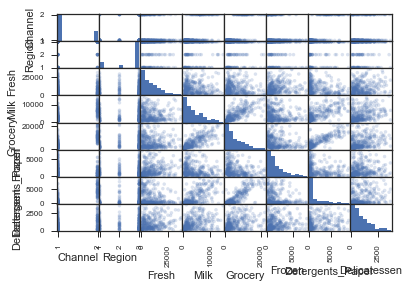

In [130]:
# visualize
pd.plotting.scatter_matrix(good_log_data, alpha=0.2)
plt.show()